In [1]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("solomonameh/spotify-music-dataset")

#print("Path to dataset files:", path)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#dir_path = "C:\\Users\\junio\\.cache\\kagglehub\\datasets\\solomonameh\\spotify-music-dataset\\versions\\1\\"
dir_path = ''

In [4]:
df_high = pd.read_csv(dir_path + "high_popularity_spotify_data.csv")
df_high['popularity'] = 1
df_low = pd.read_csv(dir_path + "low_popularity_spotify_data.csv")
df_high.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id,popularity
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1


In [5]:
df_low['popularity'] = 0
df_low.head()

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name,popularity
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...,0
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection,0
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5LNiqEqpDc8TuqPy79kDBu,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition),0
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,78MI7mu1LV1k4IA2HzKmHe,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella",0
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,6MN6yRVriszuyAVlyF8ndB,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter,0


### Both datasets have the same features, but the columns are in different orders.
    - We need to reorder it
    - the feature popularity is the origin of dataset: if it is high = 1 or low = 0

In [6]:
df_high_columns = df_high.columns.sort_values()
#print(df_high_columns)
#df_high_columns = df_high_columns

In [7]:
df_low_columns = df_low.columns.sort_values()
#print(df_low_columns)
#df_high_columns = df_high_columns

In [8]:
#Both datasets have the same features
print(df_high_columns == df_low_columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [9]:
#df_high = df_high[df_high_columns]
df_low = df_low[df_high.columns]
df_low.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id,popularity
0,0.746,132.310,0.636,rock,-3.785,0.1730,0.432,Creedence Clearwater Revival,4.0,0.0393,...,4A8gFwqd9jTtnsNwUu3OQx,1.0,0.0,138053.0,0.0648,5e6x5YRnMJIKvYpZxLqdpH,classic,audio_features,37i9dQZF1DWXRqgorJj26U,0
1,0.835,129.981,0.572,rock,-6.219,0.0702,0.795,Van Halen,4.0,0.0317,...,2c965LEDRNrXXCeBOAAwns,1.0,0.0,241600.0,0.1710,5FqYA8KfiwsQvyBI4IamnY,classic,audio_features,37i9dQZF1DWXRqgorJj26U,0
2,0.804,111.457,0.591,rock,-7.299,0.0818,0.658,Stevie Nicks,4.0,0.0454,...,3S404OgKoVQSJ3xXrDVlp8,1.0,0.0,329413.0,0.3270,5LNiqEqpDc8TuqPy79kDBu,classic,audio_features,37i9dQZF1DWXRqgorJj26U,0
3,0.104,76.474,0.443,jazz,-17.042,0.1910,0.394,"Ella Fitzgerald, Louis Armstrong",4.0,0.1010,...,1y5KGkUKO0NG32MhIIagCA,1.0,0.0,185160.0,0.9130,78MI7mu1LV1k4IA2HzKmHe,classic,audio_features,37i9dQZF1DXbITWG1ZJKYt,0
4,0.472,80.487,0.685,jazz,-9.691,0.2240,0.475,Galt MacDermot,4.0,0.0298,...,6f4b9wVTkKAf096k4XG6x5,0.0,9.0,205720.0,0.7850,6MN6yRVriszuyAVlyF8ndB,classic,audio_features,37i9dQZF1DXbITWG1ZJKYt,0


### An union of both dataset

In [10]:
# Combine both datasets
df = pd.concat([df_high, df_low], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    4830 non-null   float64
 1   tempo                     4830 non-null   float64
 2   danceability              4830 non-null   float64
 3   playlist_genre            4831 non-null   object 
 4   loudness                  4830 non-null   float64
 5   liveness                  4830 non-null   float64
 6   valence                   4830 non-null   float64
 7   track_artist              4831 non-null   object 
 8   time_signature            4830 non-null   float64
 9   speechiness               4830 non-null   float64
 10  track_popularity          4831 non-null   int64  
 11  track_href                4830 non-null   object 
 12  uri                       4830 non-null   object 
 13  track_album_name          4830 non-null   object 
 14  playlist

In [11]:
df.describe()

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,duration_ms,acousticness,popularity
count,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4831.000000,4830.000000,4830.000000,4830.000000,4.830000e+03,4830.000000,4831.000000
mean,0.586691,118.269293,0.622311,-9.281627,0.167613,0.481930,3.936646,0.101738,54.761126,0.201053,0.562112,5.233333,2.061508e+05,0.341217,0.348996
std,0.246263,28.512615,0.187706,7.129396,0.124429,0.258036,0.409712,0.101032,19.828573,0.351918,0.496178,3.580857,8.174556e+04,0.325382,0.476702
min,0.000202,48.232000,0.058900,-48.069000,0.021000,0.029600,1.000000,0.021900,11.000000,0.000000,0.000000,0.000000,3.537500e+04,0.000004,0.000000
25%,0.442250,96.063000,0.525000,-10.297750,0.095400,0.275000,4.000000,0.038600,41.000000,0.000000,0.000000,2.000000,1.590000e+05,0.052925,0.000000
50%,0.633000,118.059500,0.653000,-7.191000,0.118000,0.483000,4.000000,0.056100,56.000000,0.000091,1.000000,5.000000,1.948665e+05,0.224500,0.000000
75%,0.777000,136.723500,0.758000,-5.336750,0.195000,0.690000,4.000000,0.118000,72.000000,0.200500,1.000000,8.000000,2.334780e+05,0.590000,1.000000
max,0.998000,241.426000,0.979000,1.318000,0.979000,0.987000,5.000000,0.927000,100.000000,0.991000,1.000000,11.000000,1.355260e+06,0.996000,1.000000


In [12]:
df.isnull().sum()

energy                      1
tempo                       1
danceability                1
playlist_genre              0
loudness                    1
liveness                    1
valence                     1
track_artist                0
time_signature              1
speechiness                 1
track_popularity            0
track_href                  1
uri                         1
track_album_name            1
playlist_name               0
analysis_url                1
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            1
track_album_id              0
mode                        1
key                         1
duration_ms                 1
acousticness                1
id                          1
playlist_subgenre           0
type                        1
playlist_id                 0
popularity                  0
dtype: int64

In [13]:
df = df.dropna()
df.isnull().sum()

energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_href                  0
uri                         0
track_album_name            0
playlist_name               0
analysis_url                0
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            0
track_album_id              0
mode                        0
key                         0
duration_ms                 0
acousticness                0
id                          0
playlist_subgenre           0
type                        0
playlist_id                 0
popularity                  0
dtype: int64

In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4826    False
4827    False
4828    False
4829    False
4830    False
Length: 4829, dtype: bool

In [15]:
df.duplicated().sum()

0

In [16]:
df = df.drop_duplicates()
df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id,popularity
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,...,10FLjwfpbxLmW8c25Xyc2N,0.0,6.0,251668.0,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4.0,0.0358,...,7aJuG4TFXa2hmE4z1yxc3n,1.0,2.0,210373.0,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4.0,0.0368,...,0hBRqPYPXhr1RkTDG3n4Mk,1.0,1.0,166300.0,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4.0,0.0634,...,4B4Elma4nNDUyl6D5PvQkj,0.0,0.0,157280.0,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4.0,0.2600,...,2IYQwwgxgOIn7t3iF6ufFD,0.0,0.0,169917.0,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1


### Remove feature not relevant for the analysis

In [17]:
# Convert necessary columns to appropriate data types
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'],  format='%Y-%m-%d', errors='coerce')
#df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'],  format='%Y-%m-%d')

In [18]:
# Extract year, month, and day from 'track_album_release_date'
df['release_year'] = df['track_album_release_date'].dt.year
df['release_month'] = df['track_album_release_date'].dt.month
df['release_day'] = df['track_album_release_date'].dt.day

In [19]:
# Dropping columns with no values for the analysis
no_values_columns = ['track_id', 'track_album_id', 'playlist_id', 'id', 'track_href', 'analysis_url', 'uri', 'type']
df.drop(columns=no_values_columns, inplace=True)

In [20]:
# Check the shape of the combined dataset
print(f'Total records: {df.shape[0]}')
print(f'Total features: {df.shape[1]}')

Total records: 4829
Total features: 25


In [21]:
# Calculate the percentage of missing values
print(df.isnull().sum())
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
missing_percent = pd.DataFrame({'Missing Percentage': missing_percent})
missing_percent

energy                        0
tempo                         0
danceability                  0
playlist_genre                0
loudness                      0
liveness                      0
valence                       0
track_artist                  0
time_signature                0
speechiness                   0
track_popularity              0
track_album_name              0
playlist_name                 0
track_name                    0
track_album_release_date    138
instrumentalness              0
mode                          0
key                           0
duration_ms                   0
acousticness                  0
playlist_subgenre             0
popularity                    0
release_year                138
release_month               138
release_day                 138
dtype: int64


,Missing Percentage
track_album_release_date,2.857735
release_year,2.857735
release_month,2.857735
release_day,2.857735


In [22]:
# Dealing with missing values from track_album_release_date, release_year, release_month, and release_day
print(df['track_album_release_date'].isnull().sum())
df['track_album_release_date'] = df['track_album_release_date'].fillna(0)
df['release_year'] = df['release_year'].fillna(0)
df['release_month'] = df['release_month'].fillna(0)
df['release_day'] = df['release_day'].fillna(0)
print(df.isnull().sum())

138
energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_album_name            0
playlist_name               0
track_name                  0
track_album_release_date    0
instrumentalness            0
mode                        0
key                         0
duration_ms                 0
acousticness                0
playlist_subgenre           0
popularity                  0
release_year                0
release_month               0
release_day                 0
dtype: int64


In [23]:
df.dtypes

energy                      float64
tempo                       float64
danceability                float64
playlist_genre               object
loudness                    float64
liveness                    float64
valence                     float64
track_artist                 object
time_signature              float64
speechiness                 float64
track_popularity              int64
track_album_name             object
playlist_name                object
track_name                   object
track_album_release_date     object
instrumentalness            float64
mode                        float64
key                         float64
duration_ms                 float64
acousticness                float64
playlist_subgenre            object
popularity                    int64
release_year                float64
release_month               float64
release_day                 float64
dtype: object

# Mode and Key:

## Key:
- Focuses on the tonal center and overall harmonic structure.
- Often defined by a key signature.
- Can be seeing as category data
## Mode:
- Focuses on the specific arrangement of intervals within a scale.
- Creates different melodic and harmonic flavors.
- Can be seeing as category data
## Tempo:

- Definition: Tempo is the speed or pace of a piece of music.   
- It's typically measured in beats per minute (BPM).
- Can be seeing as float data

## Time signatures
- Provide the rhythmic framework for a piece of music, dictating how the beats are organized within each measure.
- Can be seeing as integer data



In [24]:
# Convert 'key' and 'mode' to categorical
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')
# Convert release_year, release_month, and release_day to integer
df.release_year = df.release_year.astype(int)
df.release_month = df.release_month.astype(int) 
df.release_day = df.release_day.astype(int) 
df.time_signature = df.time_signature.astype(int) 

df.dtypes

energy                       float64
tempo                        float64
danceability                 float64
playlist_genre                object
loudness                     float64
liveness                     float64
valence                      float64
track_artist                  object
time_signature                 int32
speechiness                  float64
track_popularity               int64
track_album_name              object
playlist_name                 object
track_name                    object
track_album_release_date      object
instrumentalness             float64
mode                        category
key                         category
duration_ms                  float64
acousticness                 float64
playlist_subgenre             object
popularity                     int64
release_year                   int32
release_month                  int32
release_day                    int32
dtype: object

In [25]:
#Derivated columns from the dataset with scale features
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df[features].describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000
mean,0.622299,0.586621,-9.283028,0.101747,0.341279,0.201094,0.167609,0.481851,118.271840
std,0.187723,0.246240,7.129469,0.101040,0.325387,0.351943,0.124442,0.258006,28.515018
min,0.058900,0.000202,-48.069000,0.021900,0.000004,0.000000,0.021000,0.029600,48.232000
25%,0.525000,0.442000,-10.298000,0.038600,0.053000,0.000000,0.095400,0.275000,96.063000
50%,0.653000,0.633000,-7.191000,0.056100,0.225000,0.000092,0.118000,0.483000,118.068000
75%,0.758000,0.777000,-5.339000,0.118000,0.590000,0.201000,0.195000,0.690000,136.732000
max,0.979000,0.998000,1.318000,0.927000,0.996000,0.991000,0.979000,0.987000,241.426000


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Create derived columns for scaled features

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features and add them as new columns
scaled_features = ['scaled_' + feature for feature in features]
df[scaled_features] = scaler.fit_transform(df[features])

# Display the first few rows to verify the scaled columns
df[scaled_features].head()

,scaled_danceability,scaled_energy,scaled_loudness,scaled_speechiness,scaled_acousticness,scaled_instrumentalness,scaled_liveness,scaled_valence,scaled_tempo
0,0.502228,0.593104,0.815842,0.009391,0.309234,0.000000,0.105428,0.527888,0.568015
1,0.747853,0.507916,0.767368,0.015357,0.200800,0.061352,0.100209,0.426572,0.293725
2,0.538094,0.809581,0.888898,0.016462,0.214857,0.000000,0.144050,0.357635,0.312204
3,0.664167,0.911806,0.890902,0.045851,0.094274,0.000000,0.295407,0.790056,0.335073
4,0.780459,0.784526,0.882661,0.263065,0.028410,0.000000,0.348643,0.949864,0.521729


# Strategic Thinking Capstone project with a music and artist dataset

## Proposal:

- Phe problem: How to help artists and producers increase the popularity of their songs.

## Analysis Questions and Insights:

### Music Characteristics and Popularity:
- Which musical characteristics (tempo, mode, duration, etc.) are most associated with a song's popularity?
- Are there patterns or trends in the structure of the most popular songs?
- How do a song's energy, danceability, and sonic qualities relate to its popularity?
### Artists and Trends:
- Which artists have the highest number of popular songs, and what characteristics differentiate them?
- How does an artist's popularity affect the performance of their songs?
- Are there genre or style trends that are rising or declining?
- How does the length of an artist's career influence their popularity?
### Genre Analysis:
- How do the musical characteristics that lead to popularity vary across different genres?
- Are there specific genres where certain musical features are more important for achieving popularity?
- How does the subgenre affect the songs popularity?

## Detailed Analysis of Features and Questions:



## Musical Characteristics and Popularity (In-Depth):
### Energy, Danceability, Valence, Loudness:
- How does the combination of these features (energy, danceability, positivity, and volume) influence song popularity in different genres(playlist_genre) and subgenres (playlist_subgenre)?
- Are there specific thresholds for these features that maximize popularity?
### Tempo, Duration_ms, Time_signature:
- What is the ideal tempo for successful songs in each genre? 
- Does song duration have a significant impact on popularity?
- How does the time signature (time_signature) affect danceability and popularity?
### Acousticness, Instrumentalness, Speechiness, Liveness:
- How does the presence of acoustic, instrumental, spoken word, and live recording elements correlate with popularity?
- Are there genres in which instrumentalization is more popular?
### Mode, Key:
- Which musical modes and keys are most popular in different genres?
- Is there a preference for songs in major or minor modes?

- How does the combination of these features (energy, danceability, positivity, and volume) influence song popularity in different genres(playlist_genre) and subgenres (playlist_subgenre)?

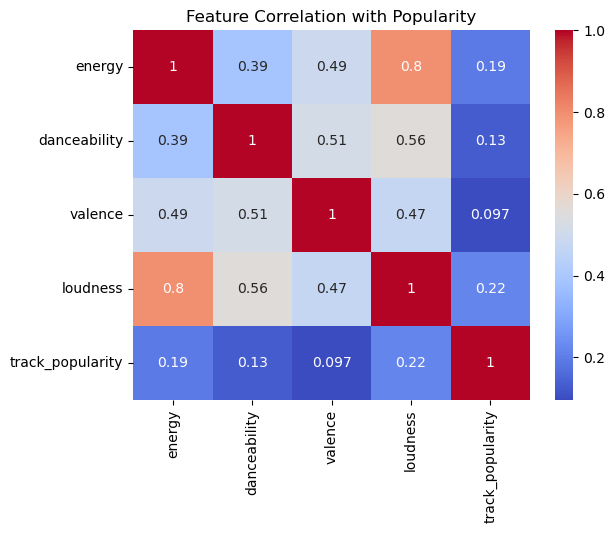

energy: 0.22
danceability: 0.23
valence: 0.22
loudness: 0.33
RMSE: 18.32


c:\Users\ester\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Filter relevant columns
features = ['energy', 'danceability', 'valence', 'loudness']
target = 'track_popularity'
X = df[features]
y = df[target]

# Correlation heatmap
sns.heatmap(df[features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Popularity')
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.2f}")

# Evaluate model
y_pred = model.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

- Are there patterns or trends in the structure of the most popular songs?

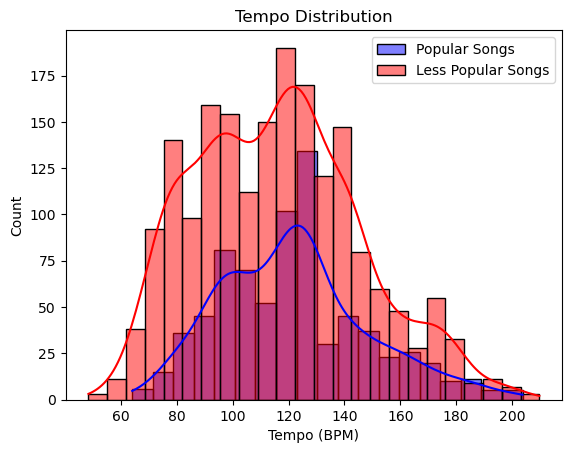

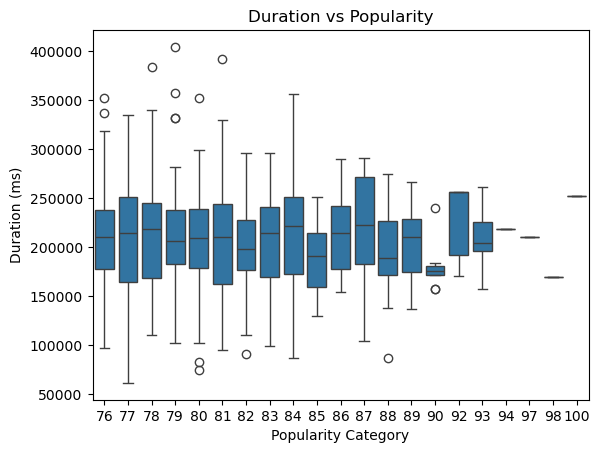

<Figure size 2000x1200 with 0 Axes>

Popular Keys:
 key
1.0     0.132802
11.0    0.107570
0.0     0.102258
7.0     0.099602
2.0     0.088977
5.0     0.088977
6.0     0.083665
9.0     0.073041
4.0     0.070385
10.0    0.065073
8.0     0.050465
3.0     0.037185
Name: proportion, dtype: float64
Popular Modes:
 mode
1.0    0.590969
0.0    0.409031
Name: proportion, dtype: float64


In [28]:
# Define popular and less popular songs
popular_songs = df[df['track_popularity'] > 75]
less_popular_songs = df[df['track_popularity'] < 50]

# Analyze tempo
sns.histplot(popular_songs['tempo'], color='blue', label='Popular Songs', kde=True)
sns.histplot(less_popular_songs['tempo'], color='red', label='Less Popular Songs', kde=True)
plt.title('Tempo Distribution')
plt.xlabel('Tempo (BPM)')
plt.legend()
plt.show()

# Analyze duration
sns.boxplot(data=popular_songs, x='track_popularity', y='duration_ms')
plt.title('Duration vs Popularity')
plt.xlabel('Popularity Category')
plt.ylabel('Duration (ms)')
plt.figure(figsize=(20, 12))
plt.show()

# Analyze key and mode
popular_keys = popular_songs['key'].value_counts(normalize=True)
popular_modes = popular_songs['mode'].value_counts(normalize=True)
print("Popular Keys:\n", popular_keys)
print("Popular Modes:\n", popular_modes)

- What is the ideal tempo for successful songs in each genre? Does song duration have a significant impact on popularity?

Average Tempo by Genre for Popular Songs:
playlist_genre
soul          159.920000
j-pop         153.468000
punk          136.510286
indie         132.988500
k-pop         128.828400
gaming        126.976963
electronic    126.343542
arabic        125.504056
hip-hop       124.219427
rock          123.499378
pop           120.707676
ambient       120.214200
metal         115.711333
latin         115.014740
folk          114.401500
brazilian     114.394500
r&b           113.490500
world         110.827000
reggae        103.314000
blues         101.837750
afrobeats     100.221000
Name: tempo, dtype: float64


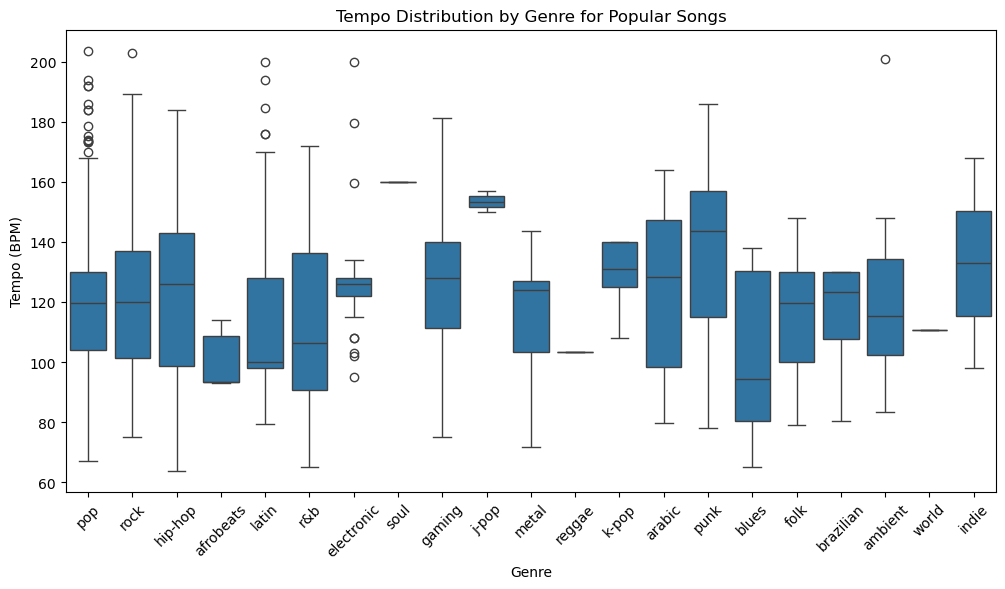

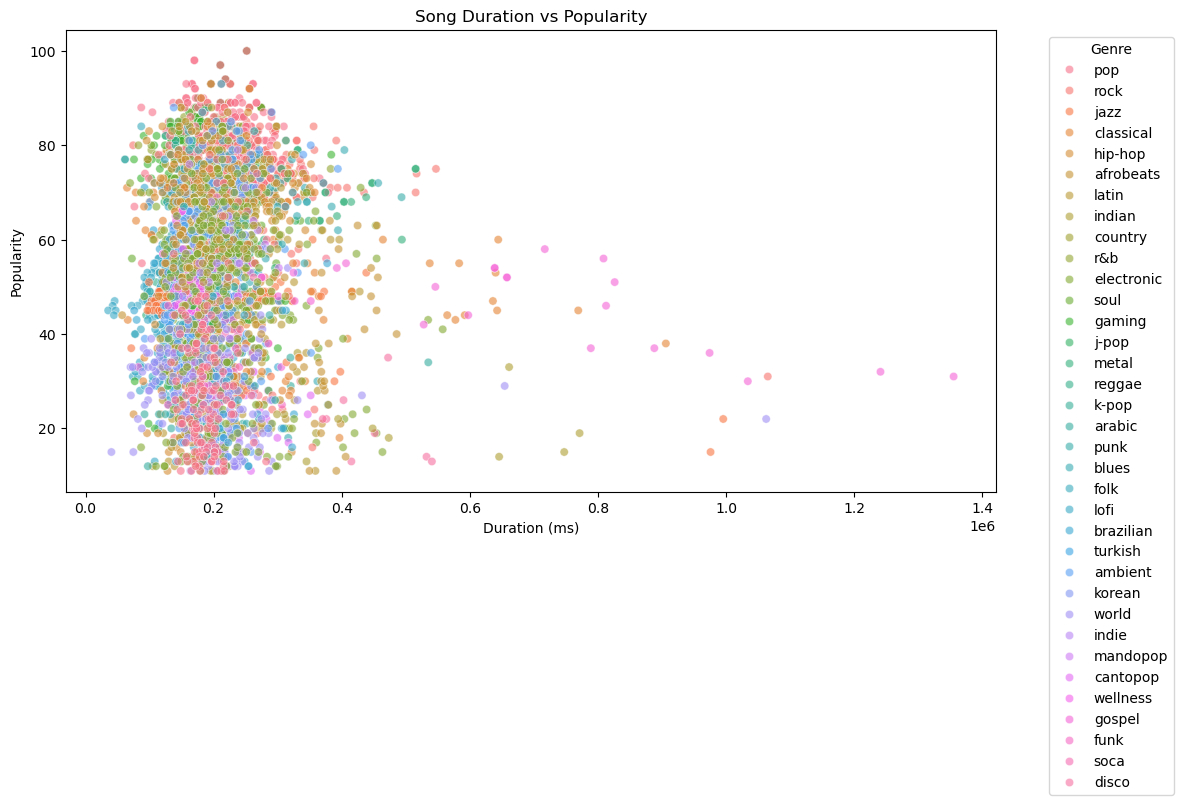

In [29]:
# Group by genre and calculate the average tempo for popular songs
popular_songs = df[df['track_popularity'] > 75]
avg_tempo_by_genre = popular_songs.groupby('playlist_genre')['tempo'].mean().sort_values(ascending=False)
print("Average Tempo by Genre for Popular Songs:")
print(avg_tempo_by_genre)

# Visualize tempo distribution for popular songs by genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=popular_songs, x='playlist_genre', y='tempo')
plt.title('Tempo Distribution by Genre for Popular Songs')
plt.xlabel('Genre')
plt.ylabel('Tempo (BPM)')
plt.xticks(rotation=45)
plt.show()

# Analyze the relationship between song duration and popularity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='duration_ms', y='track_popularity', hue='playlist_genre', alpha=0.6)
plt.title('Song Duration vs Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Analyze the relationship between song duration and popularity
#plt.figure(figsize=(12, 6))
#sns.scatterplot(data=df, x='duration_ms', y='track_popularity', hue='playlist_subgenre', alpha=0.6)
#plt.title('Song Duration vs Popularity')
#plt.xlabel('Duration (ms)')
#plt.ylabel('Popularity')
#plt.legend(title='Sub genre', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.show()

- How does the time signature (time_signature) affect danceability and popularity?

                danceability  track_popularity
time_signature                                
1                   0.406749         50.837838
3                   0.414147         53.508671
4                   0.646018         55.065425
5                   0.477412         49.847682


C:\Users\ester\AppData\Local\Temp\ipykernel_8756\847006251.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_signature_analysis.index, y=time_signature_analysis['danceability'], ax=ax[0], palette='viridis')
C:\Users\ester\AppData\Local\Temp\ipykernel_8756\847006251.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_signature_analysis.index, y=time_signature_analysis['track_popularity'], ax=ax[1], palette='viridis')


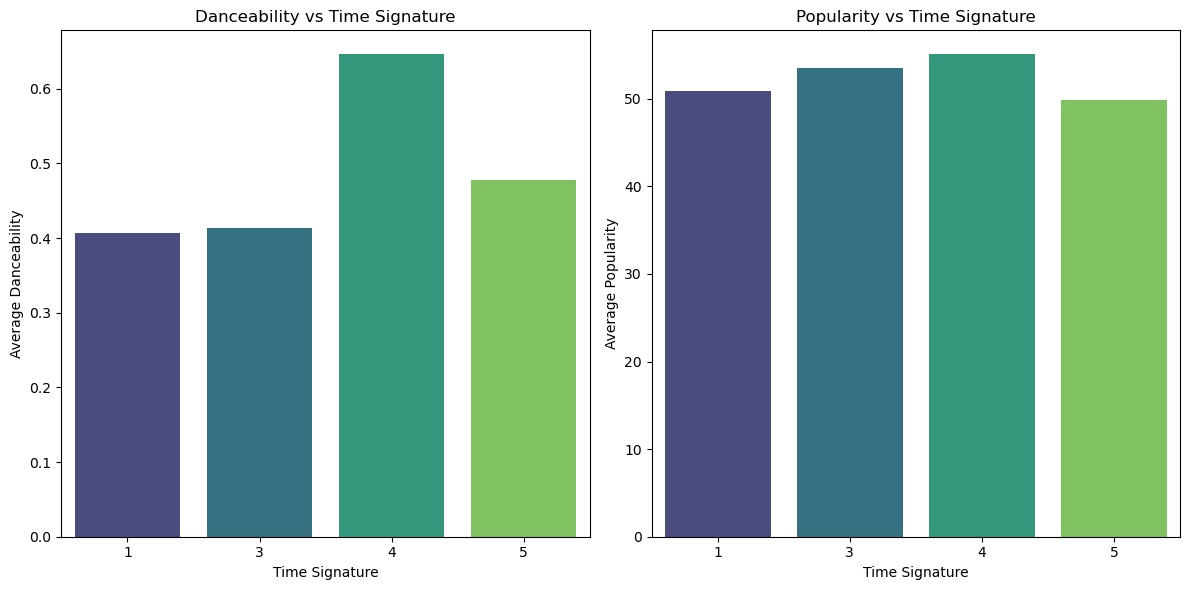

In [30]:
# Group by time_signature and calculate mean danceability and popularity
time_signature_analysis = df.groupby('time_signature')[['danceability', 'track_popularity']].mean()

# Display the results
print(time_signature_analysis)

# Visualize the relationship
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Danceability vs Time Signature
sns.barplot(x=time_signature_analysis.index, y=time_signature_analysis['danceability'], ax=ax[0], palette='viridis')
ax[0].set_title('Danceability vs Time Signature')
ax[0].set_xlabel('Time Signature')
ax[0].set_ylabel('Average Danceability')

# Popularity vs Time Signature
sns.barplot(x=time_signature_analysis.index, y=time_signature_analysis['track_popularity'], ax=ax[1], palette='viridis')
ax[1].set_title('Popularity vs Time Signature')
ax[1].set_xlabel('Time Signature')
ax[1].set_ylabel('Average Popularity')

plt.tight_layout()
plt.show()

- Which artists have the highest number of popular songs, and what characteristics differentiate them?

In [31]:
# Define a threshold for popularity
popularity_threshold = 75

# Filter popular songs
popular_songs = df[df['track_popularity'] > popularity_threshold]

# Count the number of popular songs per artist
artist_popularity_count = popular_songs['track_artist'].value_counts().head(10)

# Display the top 10 artists with the highest number of popular songs
print("Top 10 Artists with the Most Popular Songs:")
print(artist_popularity_count)

# Analyze characteristics of popular songs by these artists
top_artists = artist_popularity_count.index
top_artist_songs = popular_songs[popular_songs['track_artist'].isin(top_artists)]

# Calculate average characteristics for these artists
artist_characteristics = top_artist_songs.groupby('track_artist')[['energy', 'danceability', 'valence', 'tempo']].mean()
print("\nAverage Characteristics of Popular Songs by Top Artists:")
print(artist_characteristics)

Top 10 Artists with the Most Popular Songs:
track_artist
Sabrina Carpenter        11
Linkin Park              10
Red Hot Chili Peppers     8
Hozier                    8
Bruno Mars                8
Coldplay                  6
AC/DC                     6
Juice WRLD                6
Avicii                    6
Gunna                     6
Name: count, dtype: int64

Average Characteristics of Popular Songs by Top Artists:
                         energy  danceability   valence       tempo
track_artist                                                       
AC/DC                  0.789500      0.460000  0.619667  146.790333
Avicii                 0.802333      0.554667  0.606833  126.347333
Bruno Mars             0.692625      0.703250  0.614125  120.595750
Coldplay               0.505667      0.407333  0.214000  145.574500
Gunna                  0.573000      0.873333  0.445167  131.665667
Hozier                 0.564125      0.667625  0.706375  119.634000
Juice WRLD             0.610833    

- How does an artist's popularity affect the performance of their songs?

Top 10 Artists by Average Song Popularity:
track_artist
Lady Gaga, Bruno Mars             100.0
ROSÉ, Bruno Mars                   98.0
Oscar Maydon, Fuerza Regida        93.0
The Weeknd, Playboi Carti          92.0
Jimin                              92.0
Chappell Roan                      91.6
Tyler, The Creator, Kali Uchis     90.0
The Neighbourhood                  90.0
JENNIE                             89.0
Omar Courtz, De La Rose            89.0
Name: track_popularity, dtype: float64


C:\Users\ester\AppData\Local\Temp\ipykernel_8756\3436868929.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_performance.head(10).index, y=artist_performance.head(10).values, palette='viridis')


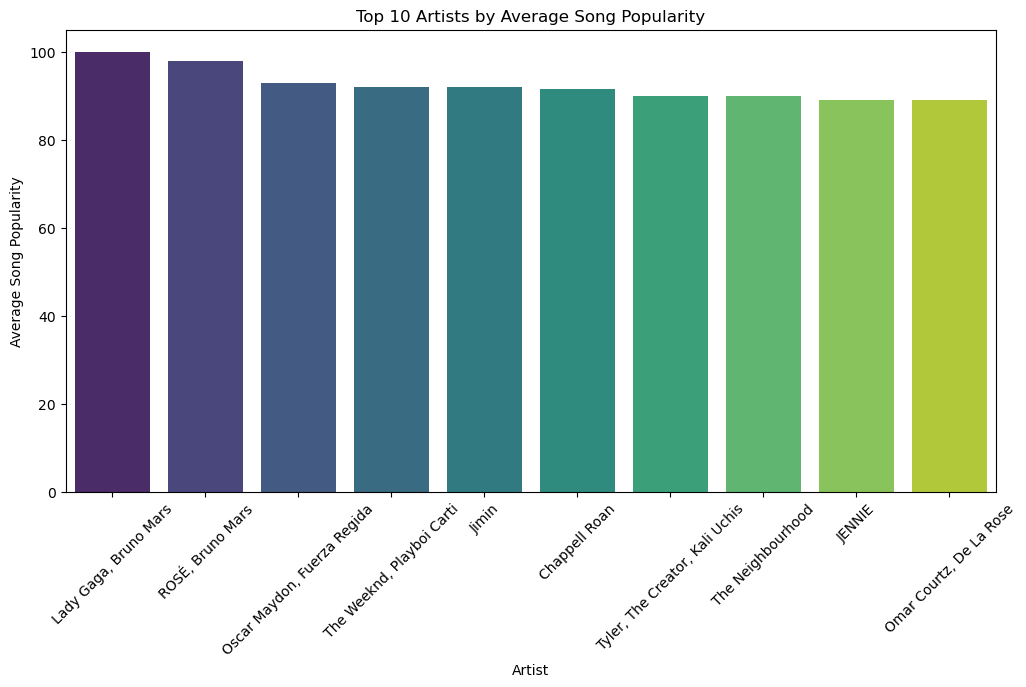

In [32]:
# Group by artist and calculate the average popularity of their songs
artist_performance = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False)

# Display the top 10 artists with the highest average song popularity
print("Top 10 Artists by Average Song Popularity:")
print(artist_performance.head(10))

# Visualize the relationship between artist popularity and song performance
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_performance.head(10).index, y=artist_performance.head(10).values, palette='viridis')
plt.title('Top 10 Artists by Average Song Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Song Popularity')
plt.xticks(rotation=45)
plt.show()

- Are there genre or style trends that are rising or declining?

<Figure size 1200x600 with 0 Axes>

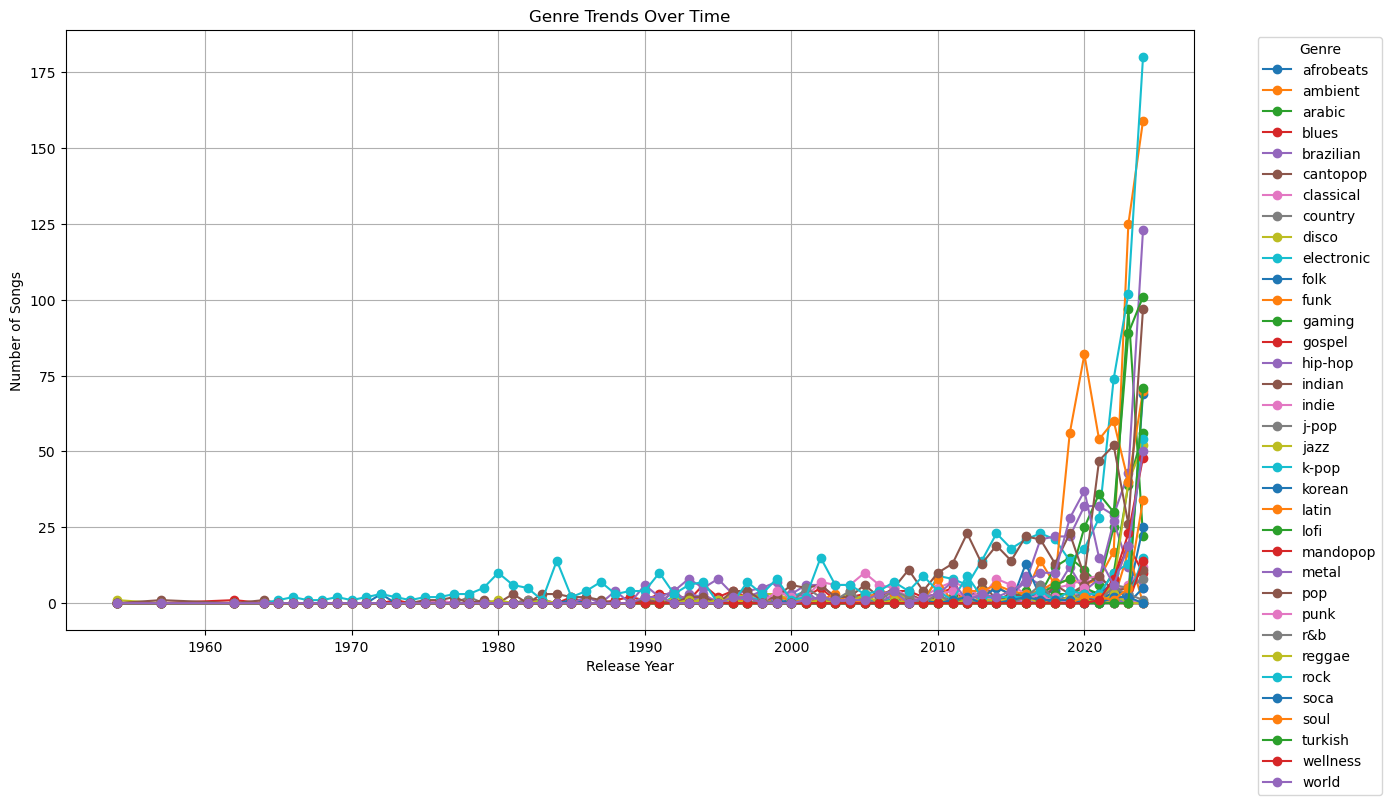

In [33]:
# Group by release_year and playlist_genre to count the number of songs
genre_trends = df[df['release_year'] > 1900].groupby(['release_year', 'playlist_genre']).size().unstack(fill_value=0)

# Plot the trends over time
plt.figure(figsize=(12, 6))
genre_trends.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Genre Trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

- How does the length of an artist's career influence their popularity?

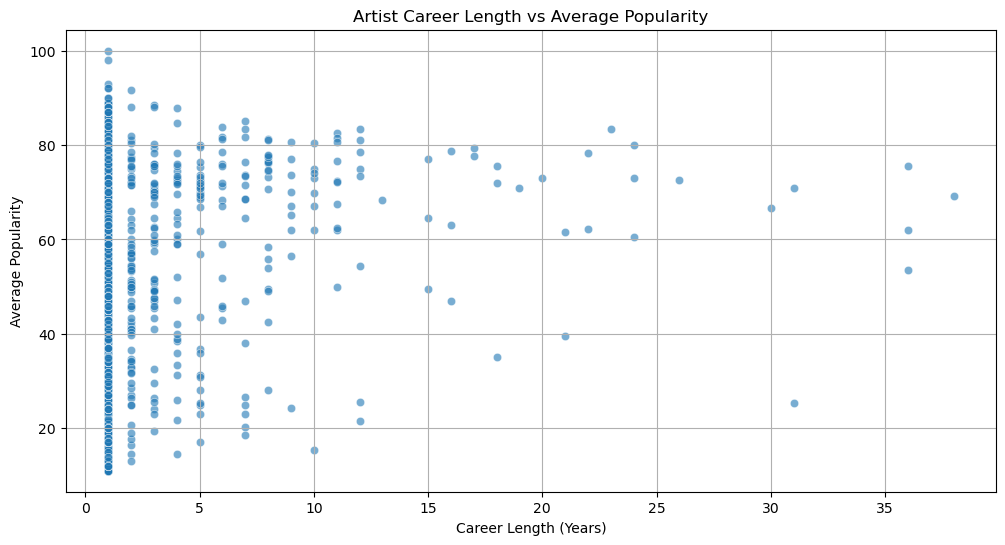

In [34]:
# Calculate the career length for each artist
artist_career = df[df['release_year'] > 1900].groupby('track_artist')['release_year'].agg(['min', 'max'])
artist_career['career_length'] = artist_career['max'] - artist_career['min'] + 1

# Calculate the average popularity for each artist
artist_popularity = df[df['release_year'] > 1900].groupby('track_artist')['track_popularity'].mean()

# Merge career length and popularity into a single DataFrame
artist_analysis = artist_career.merge(artist_popularity, left_index=True, right_index=True)
artist_analysis.rename(columns={'track_popularity': 'average_popularity'}, inplace=True)

# Visualize the relationship between career length and average popularity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=artist_analysis, x='career_length', y='average_popularity', alpha=0.6)
plt.title("Artist Career Length vs Average Popularity")
plt.xlabel("Career Length (Years)")
plt.ylabel("Average Popularity")
plt.grid(True)
plt.show()

- How do the musical characteristics that lead to popularity vary across different genres?

Average Musical Characteristics by Genre for Popular Songs:
                scaled_energy  scaled_danceability  scaled_valence  \
playlist_genre                                                       
afrobeats            0.752789             0.721769        0.807116   
ambient              0.414661             0.455766        0.281330   
arabic               0.638760             0.752744        0.340308   
blues                0.724894             0.718373        0.622023   
brazilian            0.647724             0.777198        0.731565   
electronic           0.755044             0.671707        0.477265   
folk                 0.392162             0.528765        0.433100   
gaming               0.690281             0.711749        0.500051   
hip-hop              0.626898             0.726667        0.386594   
indie                0.900280             0.598413        0.744099   
j-pop                0.809581             0.688077        0.763422   
k-pop                0.782521 

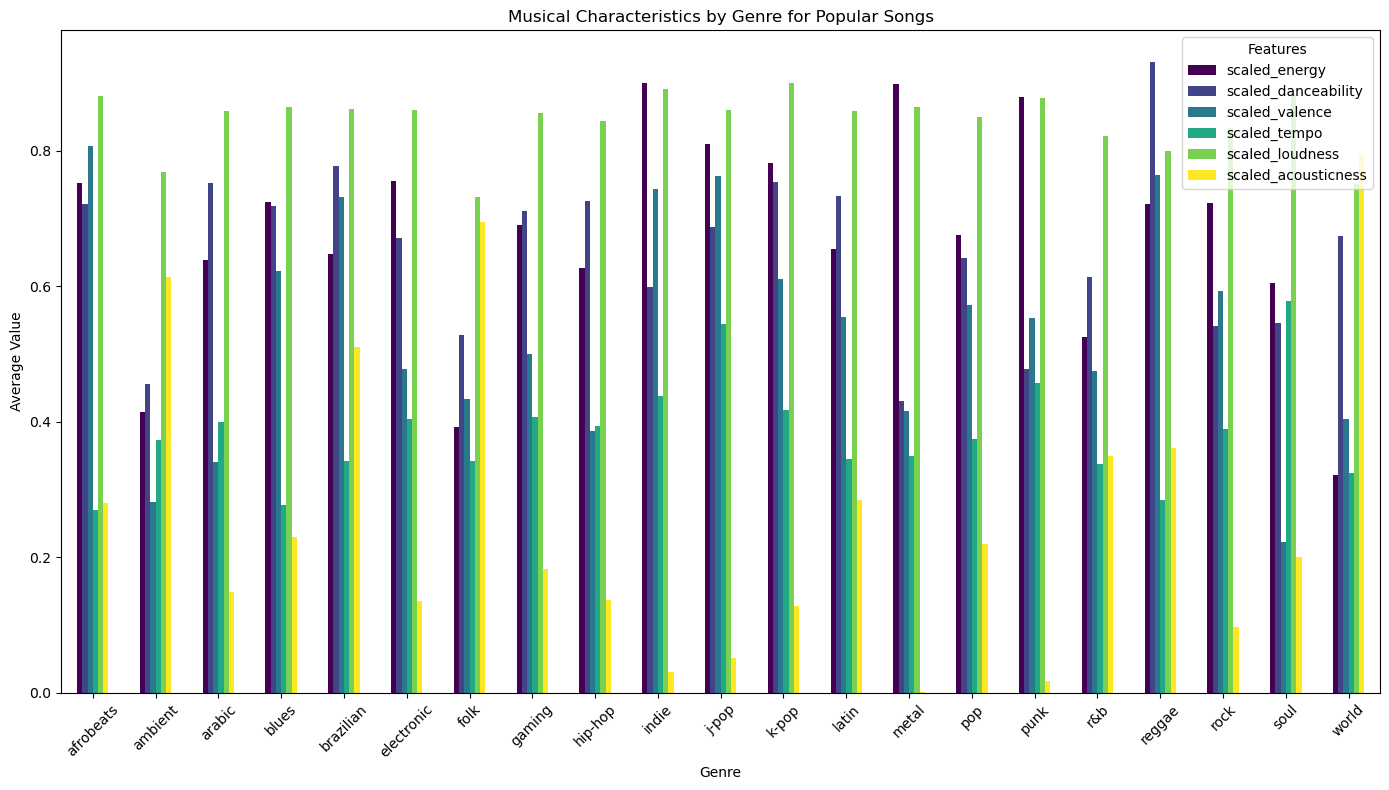

In [ ]:
# Define a threshold for popularity
popularity_threshold = 75

# Check if the 'popularity' column exists
if 'track_popularity' not in df.columns:
	raise ValueError("The 'popularity' column does not exist in the DataFrame.")

# Filter popular songs
popular_songs = df[df['track_popularity'] > popularity_threshold]

# Check if there are any popular songs
if popular_songs.empty:
	print(f"No songs found with popularity greater than {popularity_threshold}.")
else:
	# Group by genre and calculate average values for key musical features
	features = ['scaled_energy', 'scaled_danceability', 'scaled_valence', 'scaled_tempo', 'scaled_loudness', 'scaled_acousticness']
	genre_characteristics = popular_songs.groupby('playlist_genre')[features].mean()

	# Display the results
	print("Average Musical Characteristics by Genre for Popular Songs:")
	print(genre_characteristics)

	# Visualize the characteristics
	genre_characteristics.plot(kind='bar', figsize=(14, 8), colormap='viridis')
	plt.title('Musical Characteristics by Genre for Popular Songs')
	plt.xlabel('Genre')
	plt.ylabel('Average Value')
	plt.xticks(rotation=45)
	plt.legend(title='Features')
	plt.tight_layout()
	plt.show()

- How does the subgenre affect the songs popularity?

Top Subgenres by Average Popularity:
playlist_subgenre
global         87.680000
mainstream     86.787234
soft           78.551020
throwback      76.733333
80s            73.288889
melodic        72.878788
techno         72.739130
pop punk       70.933333
90s            68.418605
alternative    68.175439
Name: track_popularity, dtype: float64


C:\Users\ester\AppData\Local\Temp\ipykernel_8756\2741900857.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subgenre_popularity.index[:10], y=subgenre_popularity.values[:10], palette='viridis')


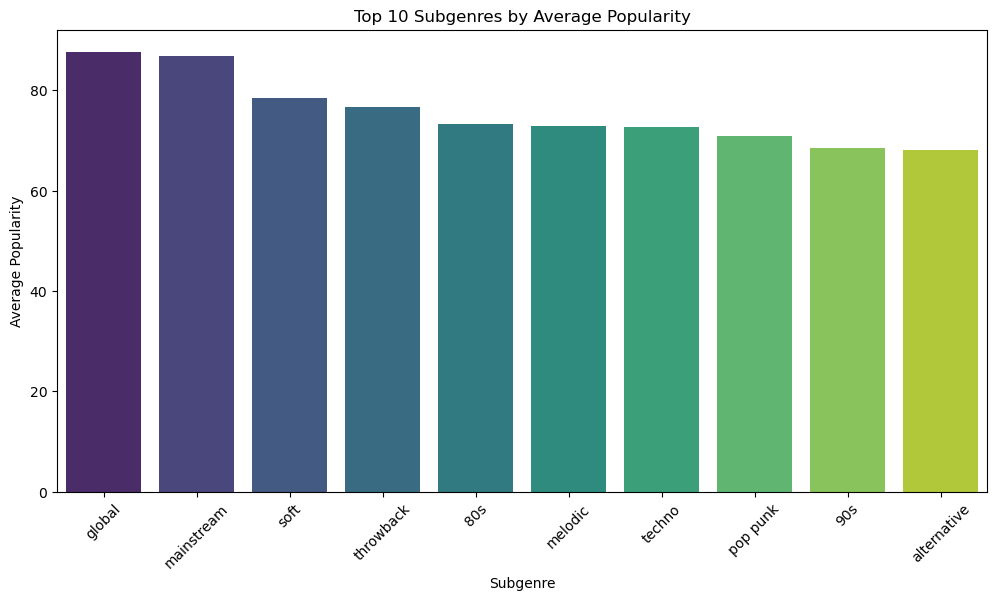

In [40]:
# Group by subgenre and calculate the average popularity
subgenre_popularity = df.groupby('playlist_subgenre')['track_popularity'].mean().sort_values(ascending=False)

# Display the top subgenres by average popularity
print("Top Subgenres by Average Popularity:")
print(subgenre_popularity.head(10))

# Visualize the popularity of subgenres
plt.figure(figsize=(12, 6))
sns.barplot(x=subgenre_popularity.index[:10], y=subgenre_popularity.values[:10], palette='viridis')
plt.title('Top 10 Subgenres by Average Popularity')
plt.xlabel('Subgenre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()

## Artists and Trends (In-Depth):
### Track_artist, Track_album_name, Track_album_release_date:
- How does the consistency and frequency of album releases affect an artist's popularity?
- Are there artists with a consistent musical style who have greater success?
- How the album release date, affects the song popularity?
### Track_popularity, Popularity:
- How does track popularity compare to the artist's overall popularity?
- Which artists manage to maintain high popularity over time?

## Genre and Subgenre (In-Depth):
### Playlist_genre, Playlist_subgenre:
- Which subgenres are on the rise within each main genre?
- How do musical characteristics vary between different subgenres?
- Which Genre has the biggest variance in popularity.

## Temporal Analysis:
### Release_year, Release_month, Release_day:
- Are there seasonal trends in song popularity?
- How song popularity change through the years?
- Are there days of the week that have more popular song releases?

## Playlists:
### Playlist_name:
- Which playlists tend to have the most popular songs?
- What characteristics do songs in popular playlists share?